In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df = pd.read_csv('data/gbm-data.csv')
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.iloc[:, 1:]
y = df['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

      Iter       Train Loss   Remaining Time 
         1           1.0190           14.00s
         2           0.9192           13.84s
         3           0.8272           12.06s
         4           0.7834           10.75s
         5           0.7109           10.55s
         6           0.6368           11.15s
         7           0.5797           11.05s
         8           0.5610           10.34s
         9           0.5185           10.11s
        10           0.4984            9.65s
        20           0.1999            9.09s
        30           0.1313            7.97s
        40           0.0790            7.52s
        50           0.0511            7.66s
        60           0.0352            7.81s
        70           0.0245            7.49s
        80           0.0162            6.91s
        90           0.0114            6.34s
       100           0.0077            5.88s
       200           0.0004            1.67s
      Iter       Train Loss   Remaining Time 
        

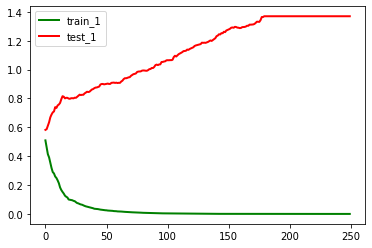

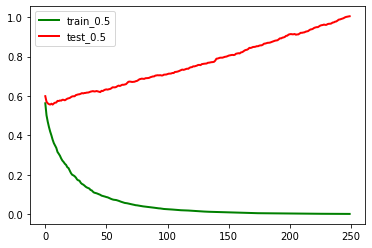

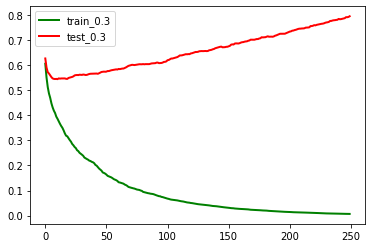

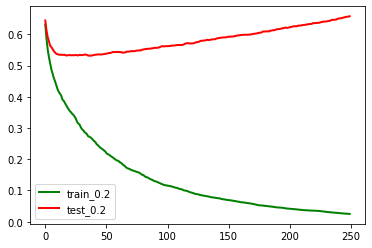

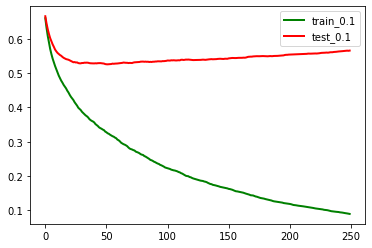

In [46]:
rates = [1, 0.5, 0.3, 0.2, 0.1]
min_loss = []

for rate in rates:
    clf = GradientBoostingClassifier(learning_rate=rate, n_estimators=250, verbose=True, random_state=241)
    clf.fit(X_train, y_train)
    
    loss_train = []
    score_gen_train = clf.staged_decision_function(X_train)
    for score in score_gen_train:
        y_pred = [1 / (1 + np.exp(-s)) for s in score]
        loss_train.append(log_loss(y_train, y_pred))
    
    loss_test = []
    score_gen_test = clf.staged_decision_function(X_test)
    for score in score_gen_test:
        y_pred = [1 / (1 + np.exp(-s)) for s in score]
        loss_test.append(log_loss(y_test, y_pred))
    
    min_loss.append(min(loss_test))
    if rate == 0.2:
        loss_test_02 = loss_test
    
    plt.figure()
    plt.plot(loss_train, 'g', linewidth=2)
    plt.plot(loss_test, 'r', linewidth=2)
    plt.legend([f'train_{rate}', f'test_{rate}'])

In [49]:
print(min_loss)
n_iter = np.argmin(loss_test_02)
print(f'{loss_test_02[n_iter]:0.2f}', n_iter)

[0.5822942594278475, 0.5560965876181979, 0.5432596932316428, 0.5314949511258739, 0.5254924770369842]
0.53 36


In [60]:
clf = RandomForestClassifier(n_estimators=36, random_state=241) #если взять n_estimators=1000 будет лучше результат
clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)
loss = log_loss(y_test, pred)
print(f'{loss:0.2f}')

0.54
